# Model Comparision

Comparing the different DL models.

In [1]:
import DataLoader, Training, os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Run Benchmark
parameters = {
    # data
    "data_path": "F:/Masterthesis/Data",
    "task": "N170",
    "preprocessing": "medium",
    "n_subjects": 40,
    "reject_incorrect_responses": True,
    # model
    "model": "eegnet",
    "n_classes": 2,
    "n_chans": 30,
    "input_window_samples": 255,
    "seed": 42,
    # classifier
    "lr": 0.001,
    "weight_decay": 0.0,
    "batch_size": 64,
    "n_epochs": 25,
    "n_splits": 5,
    "model_folder": "models_model_comparision"
}
results = []
#for model in ["eegnet", "shallow", "deep"]:
for model in ["shallow"]:
    parameters["model"] = model
    if model == "eegnet":
        parameters["lr"] = 0.005
    elif model == "shallow":
        parameters["lr"] = 0.01
    elif model == "deep":
        parameters["lr"] = 0.01
    for task in ["N170", "N400", "P3", "N2pc", "MMN", "ERN", "LRP"]:
        parameters["task"] = task
        df = DataLoader.load_df(parameters)
        data, labels = DataLoader.create_data_labels(df)
        Training.run_exp(data, labels, parameters)

In [4]:
# Get Results
results = []
for model in ["eegnet","shallow","deep"]:
    parameters["model"] = model
    for preprocessing in ["medium"]:
        parameters["preprocessing"] = preprocessing
        for task in ["N170", "N400", "P3", "N2pc", "MMN", "ERN", "LRP"]:
            parameters["task"] = task
            df = Training.load_exp(parameters)
            df["Model"] = model
            df["Preprocessing"] = preprocessing
            df["Task"] = task
            results.append(df.iloc[-1])
df_results = pd.concat(results, axis=1)
df_results = df_results.transpose().reset_index()
# Put results in correct dataframe for seaborn plot
df_task = df_results[["Task", "Model", "Preprocessing","valid_balanced_accuracy"]]
df_task = df_task.rename(columns={"valid_balanced_accuracy": "Validation Balanced Accuracy"})
list = []
for i in range(3,8):
    list.append(df_task.iloc[:,[0,1,2,i]])
df_task = pd.concat(list, axis=0)

In [10]:
df_task

,Task,Model,Preprocessing,Validation Balanced Accuracy
0,N170,eegnet,medium,0.781546
1,N400,eegnet,medium,0.792557
2,P3,eegnet,medium,0.792636
3,N2pc,eegnet,medium,0.685227
4,MMN,eegnet,medium,0.593803
...,...,...,...,...
16,P3,deep,medium,0.77569
17,N2pc,deep,medium,0.677963
18,MMN,deep,medium,0.604609
19,ERN,deep,medium,0.895686


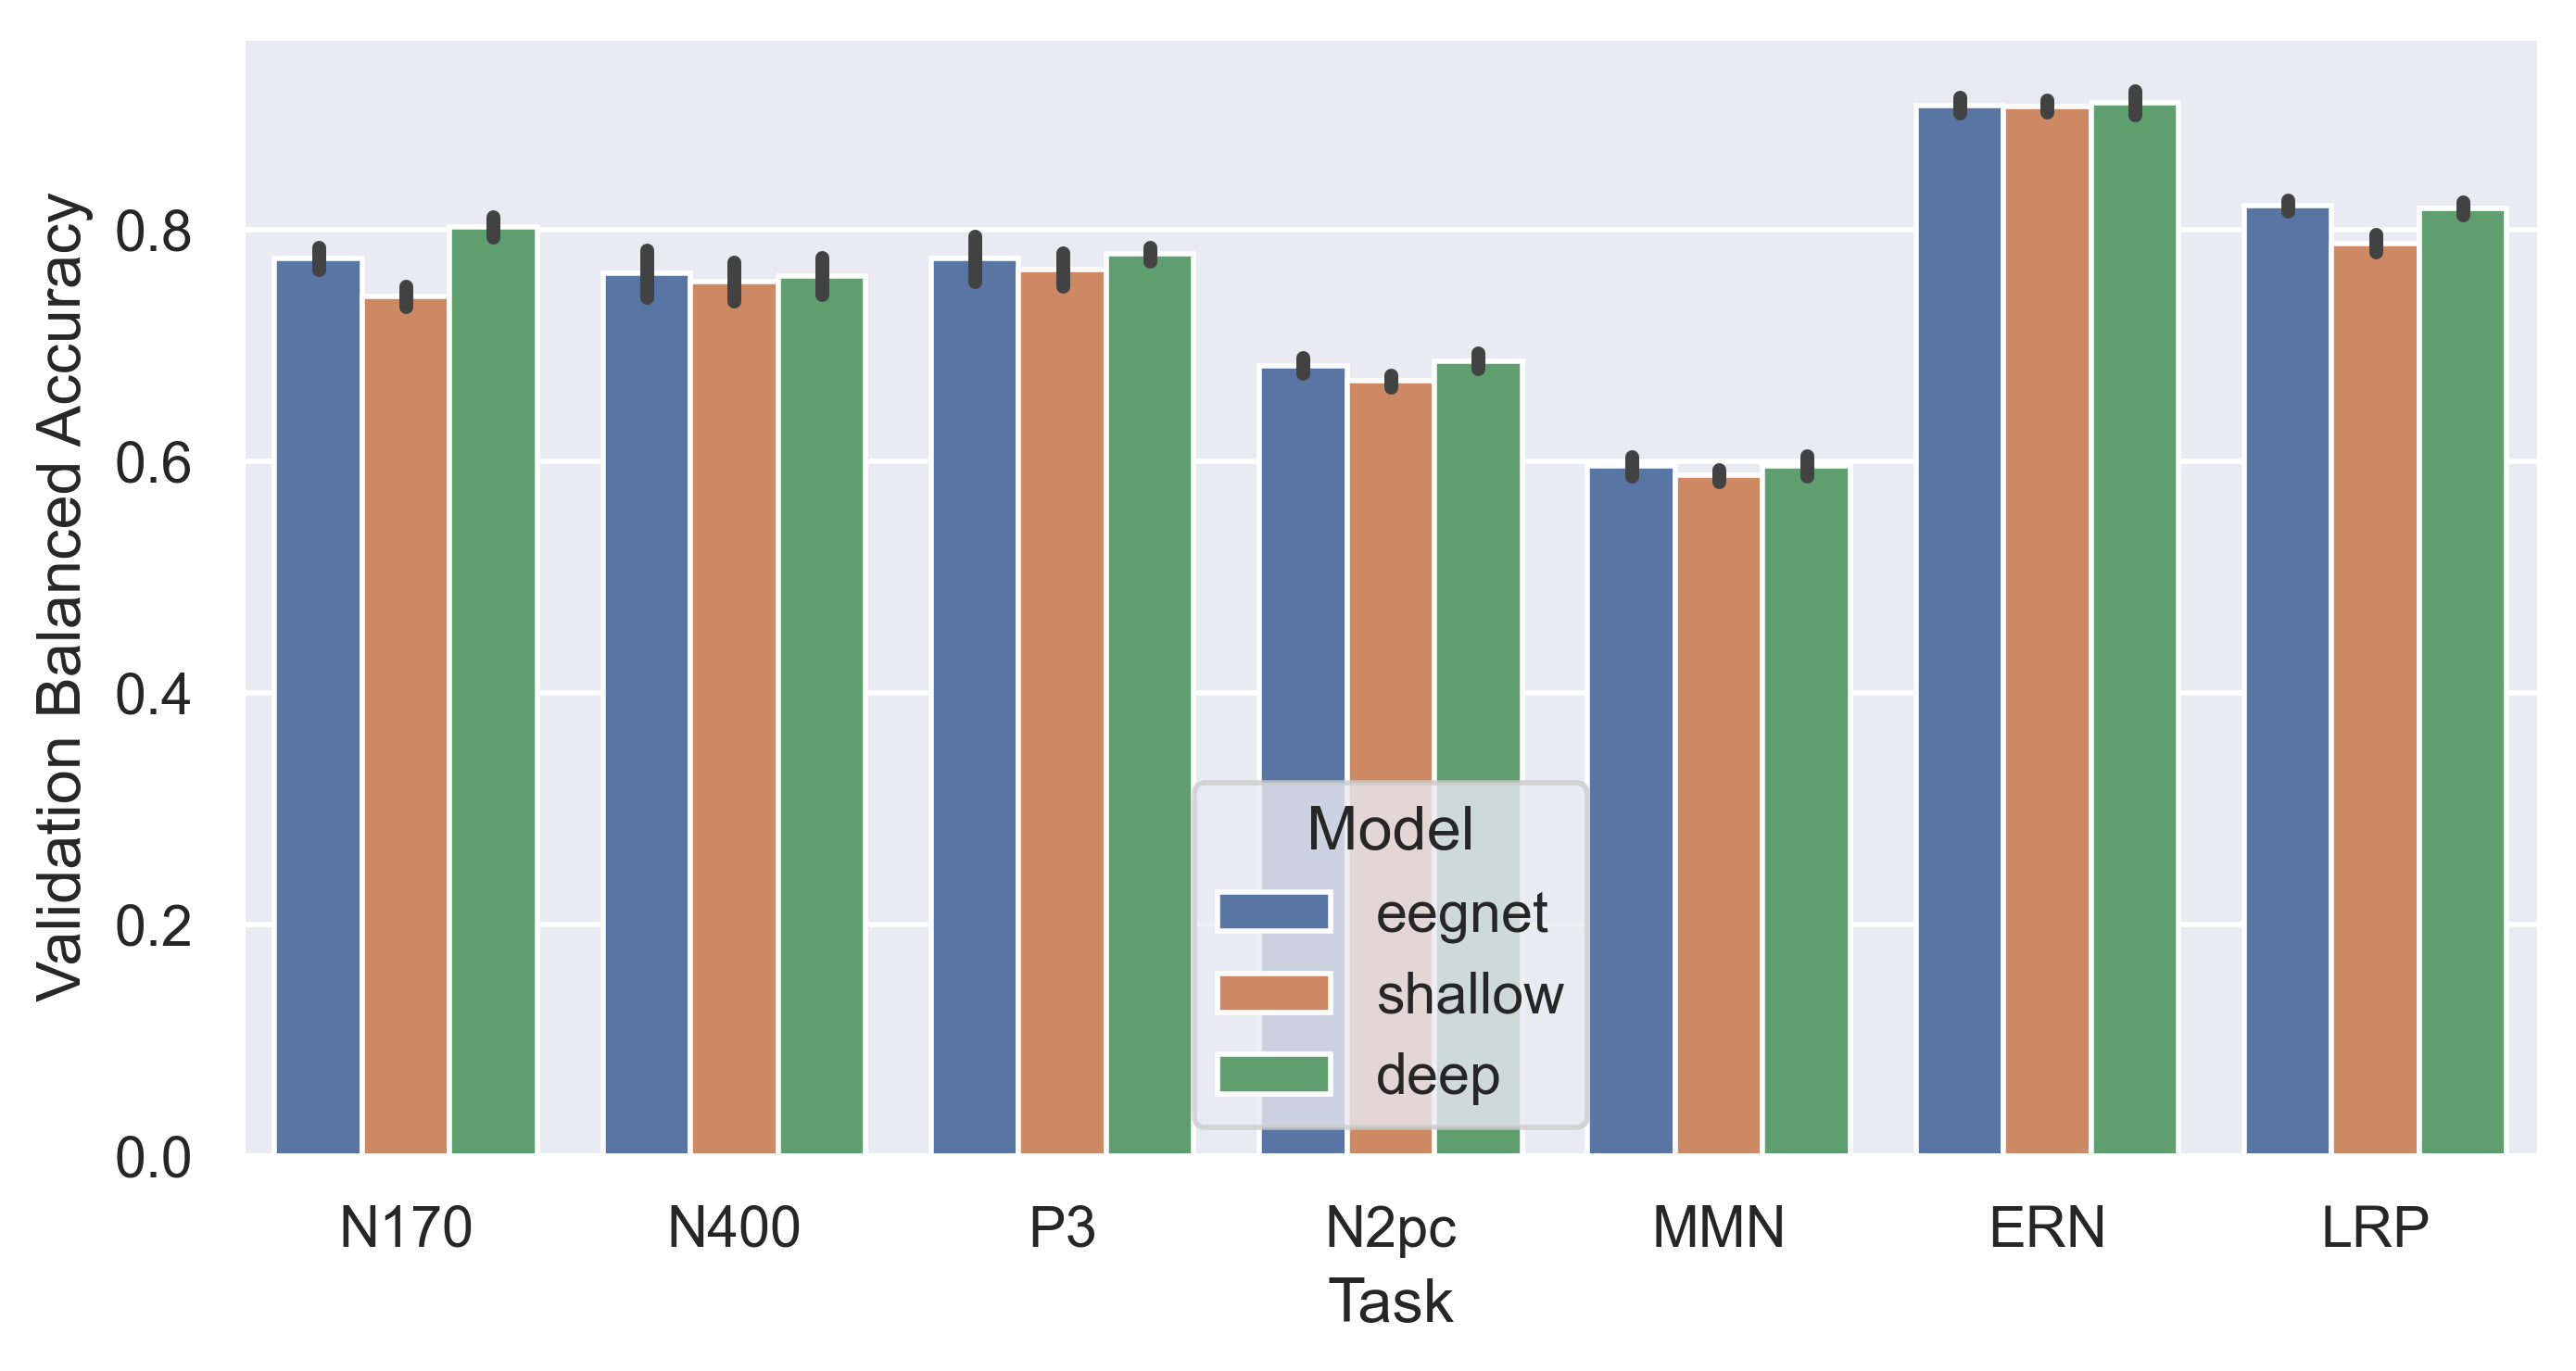

In [9]:
# N170 plot, no downsampling
sns.set(style="darkgrid")
plt.figure(figsize=(8, 4), dpi=400)
sns.barplot(x="Task", y="Validation Balanced Accuracy", 
            hue="Model", 
            data=df_task, ci="sd");